# Perceptron

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

The Iris flower dataset will be used in this notebook. It contains 150 examples of Iris flowers belonging to 3 species *Iris-setosa*, *Iris-versicolor* and, *Iris-virginica*. Each example has 4 features *sepal length*, *sepal width*, *petal length*, and *petal width*. See the image below for an illustration.


<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png" alt="alt text" width="500" height="200">

In [ ]:
# Define the URL for the Iris dataset
URL_ = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# Read the dataset into a pandas DataFrame
data = pd.read_csv(URL_, header=None)

# Print the data
data.head(10)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


Considering the Iris-setosa as the positive class and the others as negative. For visualization purposes, Using the first two features (*i.e.*, sepal length, sepal width) in the experiments.


In [ ]:
# Convert the target variable to binary labels
# 1 for Iris-setosa, -1 for others (ie., Iris-versicolor and Iris-virginica)
data[4] = np.where(data.iloc[:, -1] == 'Iris-setosa', 1, -1)

# Convert the DataFrame to a NumPy array
data = np.asarray(data, dtype='float64')

# Extract the first two features (sepal length and sepal width) and the labels
X = data[:100, :2]
y = data[:100, -1]

The following code plots the data in a 2D space. The positive class is shown in red and the negative class is shown in blue.

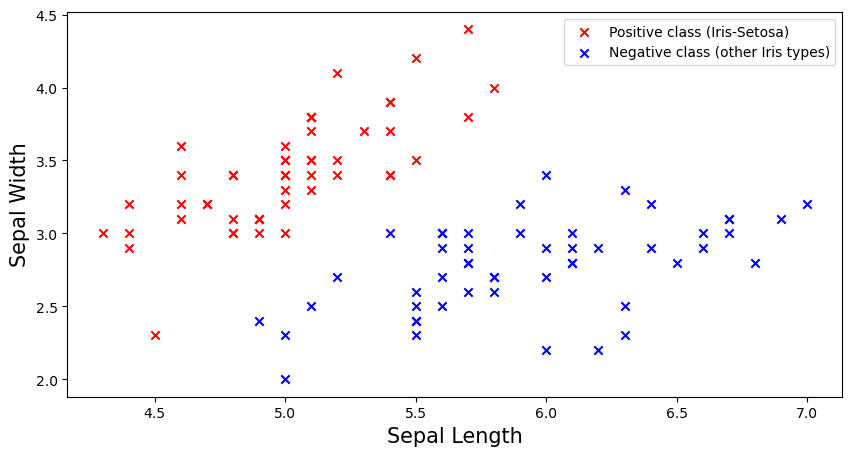

In [ ]:
fig = plt.figure(figsize=(10, 5))
# Visualize the data
plt.scatter(X[y==1, 0], X[y==1, 1], c='red', marker='x', label='Positive class (Iris-Setosa)')
plt.scatter(X[y==-1, 0], X[y==-1, 1], c='blue', marker='x', label='Negative class (other Iris types)')

# Set the x and y axis labels
plt.xlabel('Sepal Length', size=15)
plt.ylabel('Sepal Width', size=15)

# Add a legend
plt.legend(['Positive class (Iris-Setosa)', 'Negative class (other Iris types)'], loc='best')

# Display the plot
plt.show()

## Perceptron Implementation
Implement the perceptron algorithm, a linear classification algorithm, on the data. Below is a breakdown of the code and its functionality:

1. **Data.**
   - The dataset is represented by feature matrix `X` and label vector `y`.
   - The feature matrix `X` is a 2D array of shape `(n_samples, n_features)`, where `n_samples` is the number of examples and `n_features` is the number of features.

2. **Initialization:**
   - The weight vector `w` and bias `b` are initialized as zeros.
   - The weight history `w_hist` and bias history `b_hist` are created to keep track of the weight and bias values at each iteration.

3. **Perceptron Algorithm:**
   - The algorithm iterates for a maximum number of iterations defined by `max_iter`.
   - In each iteration:
     - The data points are shuffled randomly using the `np.random.permutation` function.
     - For each data point `x_i` and its corresponding label `y_i`:
       - The perceptron predicts the label `y_hat` based on the current weight and bias values.
       - If the prediction is incorrect (`y_hat` and `y_i` have different signs), the weights and bias are updated according to the perceptron update rule depicted below
       \begin{align*}
         w &\leftarrow w + y_i x_i \\
         b &\leftarrow b + y_i
       \end{align*}
   

5. **Evaluation and Reporting:**
   - After each iteration, the accuracy of the current weight and bias values is evaluated on the entire dataset.
   - The accuracy is calculated by comparing the predicted labels `y_hat_X` to the true labels `y`.
  

The perceptron algorithm aims to find the weights and bias that achieve the highest accuracy in classifying the given dataset.



In [ ]:
# Set the number of samples and dimensions
nSamples, dim = X.shape

# Set the maximum number of iterations
max_iter = 6

# Initialize the weight vector and bias as zeros
w = np.zeros([1, dim])
b = np.zeros([1, 1])

# Create lists to keep track of the weight and bias history
w_hist = [np.copy(w)]
b_hist = [np.copy(b)]

# Set the random seed to generate the same sequence of random numbers
np.random.seed(10)

# Prediction function
def predict(X, w, b):
    # Calculate the linear combination of features and weights
    z = np.dot(X, w.T) + b

    # if z >= 0, predict 1, otherwise -1
    predictions = np.where(z >= 0, 1, -1)

    return predictions

# Start the main training loop
for iter in range(max_iter):
    # Shuffle the data
    rnd_idx = np.random.permutation(nSamples)

    # Iterate over each shuffled data point
    for tmpC1 in range(nSamples):
        i = rnd_idx[tmpC1]
        x_i = X[i]
        y_i = y[i]

        # Make predictions using the current weight and bias
        y_hat = predict(x_i, w, b)

        # Update the weight and bias if the prediction is incorrect
        if (y_hat * y_i < 0):
            w += y_i * x_i
            b += y_i

    # Keep track of the weight and bias history by appending to lists
    w_hist.append(np.copy(w))
    b_hist.append(np.copy(b))

    # Evaluate the accuracy using the current weight and bias on the entire dataset
    y_hat_X = predict(X, w, b)
    acc = (y_hat_X.squeeze() == y.squeeze()).mean()

    # Print the accuracy for the current iteration
    print(f"iter{iter}: accuracy: {acc:.3f}")

iter0: accuracy: 0.610
iter1: accuracy: 0.980
iter2: accuracy: 0.960
iter3: accuracy: 0.960
iter4: accuracy: 0.900
iter5: accuracy: 0.990


## Visualizing the results

Visualizing the decision regions gives insights into how the perceptron model separates the classes in the feature space (sepal length and width).



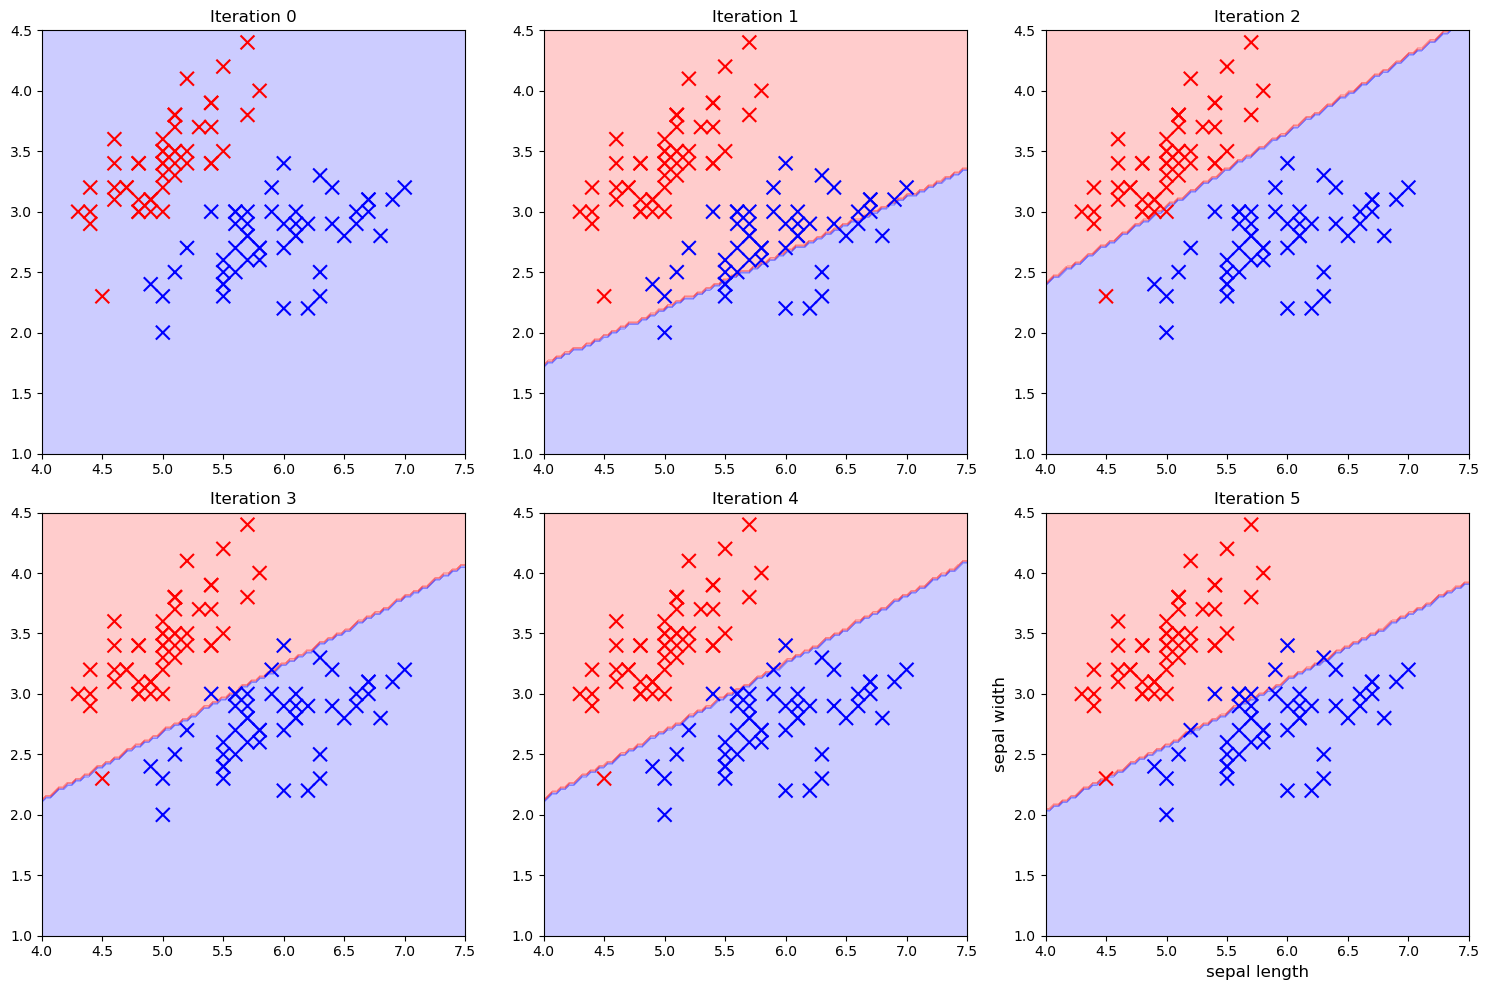

In [ ]:
# Plotting decision regions
num_plt_pnts = 100
x_plot_min, x_plot_max = 4, 7.5
y_plot_min, y_plot_max = 1, 4.5

# Create a grid of points within the specified range
xx_plot, yy_plot = np.meshgrid(np.linspace(x_plot_min, x_plot_max, num=num_plt_pnts),
                               np.linspace(y_plot_min, y_plot_max, num=num_plt_pnts))

# Reshape the grid points into a flattened array
plt_X = np.c_[xx_plot.ravel(), yy_plot.ravel()]

# Iterate over each iteration of perceptron training
plt.figure(figsize=(15, 10))
for tmpC1 in range(max_iter):
    plt.subplot(2, 3, tmpC1 + 1)  # Two rows, three columns

    # Retrieve weights and bias for the current iteration
    w_lin = w_hist[tmpC1]
    b_lin = b_hist[tmpC1]

    # Generate predictions for the plotting points and reshape them
    plt_y_hat = predict(plt_X, w_lin, b_lin).reshape(xx_plot.shape)

    # Plot the decision regions using red and blue colors
    # cmap = mpl.colors.ListedColormap(['#C8EDD6','#EABDBD'], name='from_list', N=None)
    cmap = mpl.colors.ListedColormap(["blue", "red"], name='from_list', N=None)
    scatter = plt.contourf(xx_plot, yy_plot, plt_y_hat, cmap=cmap, alpha=0.2)

    # Scatter plot of the data points

    scatter = plt.scatter(X[:, 0], X[:, 1], s=100, c=np.squeeze(y), marker='x', cmap=cmap)

    # Set informative titles for the plots
    plt.title(f"Iteration {tmpC1}")
    if tmpC1 == max_iter - 1:
        plt.xlabel("sepal length", size=12)
        plt.ylabel("sepal width", size=12)

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()